# Importação das Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# para fazer mapas/dados geolocalizados
#!pip install geopandas
import geopandas as gpd

1. Importação do Banco de Dados

In [2]:
## importar via google drive
from google.colab import drive
drive.mount('/content/drive')
df_enem = pd.read_csv('/content/drive/MyDrive/Banco de Dados/MICRODADOS_ENEM_2022_REDUZIDO.zip', encoding = 'latin1')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# importar localmente
df_enem = pd.read_csv('MICRODADOS_ENEM_2022_REDUZIDO.zip',
                      encoding = 'latin1')

2. Visualização do Banco de Dados

In [3]:
df_enem

,TP_FAIXA_ETARIA,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,...,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_REDACAO,Q006
0,14,M,2,1,1,2,NaN,0,NaN,NaN,...,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,B
1,14,M,1,1,1,16,NaN,0,NaN,NaN,...,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,Q
2,5,F,2,1,1,2,NaN,0,NaN,NaN,...,1,1,421.1,546.0,498.8,565.3,1,1.0,760.0,B
3,6,M,3,1,1,2,NaN,0,NaN,NaN,...,1,1,490.7,388.6,357.8,416.0,1,1.0,320.0,A
4,4,M,3,1,1,1,NaN,0,NaN,NaN,...,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3476100,3,M,1,1,2,0,1.0,0,NaN,NaN,...,0,0,NaN,NaN,NaN,NaN,1,NaN,NaN,F
3476101,14,F,1,1,2,0,NaN,0,2.0,1.0,...,0,0,NaN,NaN,NaN,NaN,1,NaN,NaN,B
3476102,2,M,1,1,2,0,1.0,0,2.0,1.0,...,1,1,527.9,627.0,583.3,637.1,0,1.0,660.0,G
3476103,3,M,3,1,2,0,1.0,0,4.0,1.0,...,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,E


In [46]:
df_enem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3476105 entries, 0 to 3476104
Data columns (total 24 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   TP_FAIXA_ETARIA         int64  
 1   TP_SEXO                 object 
 2   TP_COR_RACA             int64  
 3   TP_NACIONALIDADE        int64  
 4   TP_ST_CONCLUSAO         int64  
 5   TP_ANO_CONCLUIU         int64  
 6   TP_ENSINO               float64
 7   IN_TREINEIRO            int64  
 8   TP_DEPENDENCIA_ADM_ESC  float64
 9   TP_LOCALIZACAO_ESC      float64
 10  TP_SIT_FUNC_ESC         float64
 11  SG_UF_PROVA             object 
 12  TP_PRESENCA_CN          int64  
 13  TP_PRESENCA_CH          int64  
 14  TP_PRESENCA_LC          int64  
 15  TP_PRESENCA_MT          int64  
 16  NU_NOTA_CN              float64
 17  NU_NOTA_CH              float64
 18  NU_NOTA_LC              float64
 19  NU_NOTA_MT              float64
 20  TP_LINGUA               int64  
 21  TP_STATUS_REDACAO       float64

**Presença**

CÓDIGO | SIGNIFICADO
-------|-------------
0      | Faltou
1      | Presente
2      | Eliminado


In [4]:
vc_cn = df_enem['TP_PRESENCA_CN'].value_counts().reset_index()
vc_mt = df_enem['TP_PRESENCA_MT'].value_counts().reset_index()

vc_ch = df_enem['TP_PRESENCA_CH'].value_counts().reset_index()
vc_lc = df_enem['TP_PRESENCA_LC'].value_counts().reset_index()


#Renomeando as colunas para criar df
vc_cn.columns = ['TP_PRESENCA_CN', 'Count_CN']
vc_mt.columns = ['TP_PRESENCA_MT', 'Count_MT']

vc_ch.columns = ['TP_PRESENCA_CH', 'Count_CH']
vc_lc.columns = ['TP_PRESENCA_LC', 'Count_LC']

# Mescla os DataFrames com base nas colunas 'TP_PRESENCA_CN' e 'TP_PRESENCA_CH'
resultado_cn_mt = pd.merge(vc_cn, vc_mt, how='outer', left_on='TP_PRESENCA_CN', right_on='TP_PRESENCA_MT')
resultado_ch_lc = pd.merge(vc_ch, vc_lc, how='outer', left_on='TP_PRESENCA_CH', right_on='TP_PRESENCA_LC')

print(resultado_cn_mt)
print(resultado_ch_lc)

   TP_PRESENCA_CN  Count_CN  TP_PRESENCA_MT  Count_MT
0               1   2355395               1   2355395
1               0   1119133               0   1119133
2               2      1577               2      1577
   TP_PRESENCA_CH  Count_CH  TP_PRESENCA_LC  Count_LC
0               1   2493442               1   2493442
1               0    977981               0    977981
2               2      4682               2      4682


Os resultados das contagens sugerem que o TP_PRESENCA_CN E O TP_PRESENCA_MT contenham os mesmos dados.
Os mesmo pode ser dito a respeito de TP_PRESENCA_CH E TP_PRESENCA_LC. LOGO:

In [29]:
soma = df_enem['TP_PRESENCA_MT'] + df_enem['TP_PRESENCA_CN']
soma.value_counts()


2    2355395
0    1119133
4       1577
dtype: int64

### Logo quem faltou na prova MT também faltou na prova CN

In [30]:
soma2 = df_enem['TP_PRESENCA_CH'] + df_enem['TP_PRESENCA_LC']
soma2.value_counts()


2    2493442
0     977981
4       4682
dtype: int64

### Logo quem faltou na prova CH também faltou na prova LC

In [48]:
df_enem.drop(['TP_PRESENCA_CH', 'TP_PRESENCA_MT'], axis=1, inplace=True)
df_enem.rename(columns={'TP_PRESENCA_CN': 'PRESENCA_CN_E_MT'}, inplace=True)
df_enem.rename(columns={'TP_PRESENCA_LC': 'PRESENCA_LC_E_CH'}, inplace=True)
df_enem.rename(columns={'Q006': 'RENDA_MENSAL'}, inplace=True)

**NACIONALIDADE**

CÓDIGO | SIGNIFICADO
-------|-------------
1      | Brasileiro(a)
2      | Brasileiro(a) Naturalizado(a)
3      | Estrangeiro(a)
4      | Brasileiro(a) Nato(a), nascido(a) no exterior
0      | Não Informado

In [7]:
df_enem['TP_NACIONALIDADE'].unique()

array([1, 2, 3, 4, 0])

# Criação dos dicionarios para as categorias do banco de dados

In [33]:
TP_FAIXA_ETARIA = {1:'Menor de 17 anos',
2:'17 anos',
3:'18 anos',
4:'19 anos',
5:'20 anos',
6:'21 anos',
7:'22 anos',
8:'23 anos',
9:'24 anos',
10:'25 anos',
11:'Entre 26 e 30 anos',
12:'Entre 31 e 35 anos',
13:'Entre 36 e 40 anos',
14:'Entre 41 e 45 anos',
15:'Entre 46 e 50 anos',
16:'Entre 51 e 55 anos',
17:'Entre 56 e 60 anos',
18:'Entre 61 e 65 anos',
19:'Entre 66 e 70 anos',
20:'Maior de 70 anos'}

TP_ESTADO_CIVIL = {0: 'Não informado',
1:'Solteiro(a)',
2:'Casado(a)/Mora com companheiro(a)',
3:'Divorciado(a)/Desquitado(a)/Separado(a)',
4:'Viúvo(a)'}

TP_COR_RACA = {0:'Não declarado',
1:'Branca',
2:'Preta',
3:'Parda',
4:'Amarela',
5:'Indígena ',
6:'Não dispõe da informação'}

TP_NACIONALIDADE = {0:'Não informado',
1:'Brasileiro(a)',
2:'Brasileiro(a) Naturalizado(a)',
3:'Estrangeiro(a)',
4:'Brasileiro(a) Nato(a), nascido(a) no exterior'}

TP_ST_CONCLUSAO = {1:'Já concluí o Ensino Médio',
2:'Estou cursando e concluirei o Ensino Médio em 2022',
3:'Estou cursando e concluirei o Ensino Médio após 2022',
4:'Não concluí e não estou cursando o Ensino Médio'}

TP_ANO_CONCLUIU = {0:'Não informado',
1:'2021',
2:'2020',
3:'2019',
4:'2018',
5:'2017',
6:'2016',
7:'2015',
8:'2014',
9:'2013',
10:'2012',
11:'2011',
12:'2010',
13:'2009',
14:'2008',
15:'2007',
16:'Antes de 2007'}


TP_ESCOLA = { 1:'Não Respondeu', 2:'Pública', 3:'Privada'}

TP_ENSINO = {1:'Ensino Regular', 2:'Educação Especial - Modalidade Substitutiva'}


IN_TREINEIRO = {1:'Sim', 0:'Não'}


A análise acima não faz sentido pois não trata-se de dados quantitativos

Análise Descritiva para as notas obtidas no exame



In [36]:
df_enem[['NU_NOTA_CN', 'NU_NOTA_CH','NU_NOTA_LC', 'NU_NOTA_MT','NU_NOTA_REDACAO']]

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,421.1,546.0,498.8,565.3,760.0
3,490.7,388.6,357.8,416.0,320.0
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
3476100,NaN,NaN,NaN,NaN,NaN
3476101,NaN,NaN,NaN,NaN,NaN
3476102,527.9,627.0,583.3,637.1,660.0
3476103,NaN,NaN,NaN,NaN,NaN


**Há muitos valores NaN nas notas que precisarão ser tratados**

In [37]:
notas = ['NU_NOTA_CN', 'NU_NOTA_CH','NU_NOTA_LC', 'NU_NOTA_MT','NU_NOTA_REDACAO']
descritivo_notas  = df_enem[notas].describe()

In [38]:
descritivo_notas.rename(columns={'NU_NOTA_CN':'Ciencias Naturais',
                                 'NU_NOTA_CH':'Ciencias Humanas',
                                 'NU_NOTA_LC': 'Linguagem e Código',
                                 'NU_NOTA_MT': 'Matemática',
                                 'NU_NOTA_REDACAO':'Redação' },inplace=True)

descritivo_notas

,Ciencias Naturais,Ciencias Humanas,Linguagem e Código,Matemática,Redação
count,2.355395e+06,2.493442e+06,2.493442e+06,2.355395e+06,2.493442e+06
mean,4.959305e+02,5.269531e+02,5.174389e+02,5.425032e+02,6.184797e+02
std,7.200975e+01,8.148446e+01,7.755491e+01,1.160225e+02,2.122125e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.405000e+02,4.770000e+02,4.684000e+02,4.490000e+02,5.200000e+02
50%,4.856000e+02,5.299000e+02,5.255000e+02,5.308000e+02,6.200000e+02
75%,5.433000e+02,5.819000e+02,5.732000e+02,6.224000e+02,7.600000e+02
max,8.753000e+02,8.392000e+02,8.010000e+02,9.857000e+02,1.000000e+03


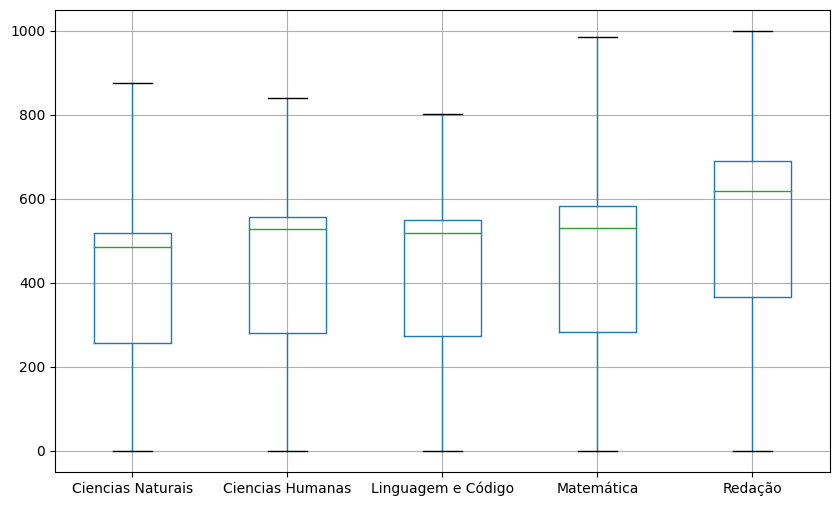

In [39]:
plt.figure(figsize=(10, 6))  # Ajuste o tamanho da figura conforme necessário
boxplot = descritivo_notas.drop('count').boxplot(widths=0.5)
figura = boxplot.get_figure()
plt.show()

In [ ]:
#### DÚVIDA DE QUAL BOXPLOT ESTÁ CERTO!!!
### Também não sei (Ricardo)

Text(0.5, 0, 'Blocos de Conhecimento')

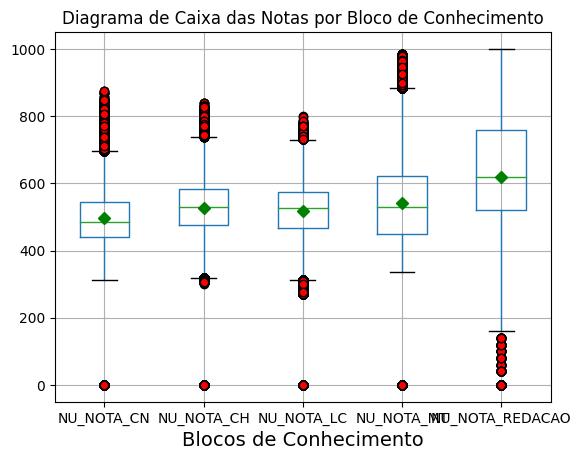

In [40]:
plt.title("Diagrama de Caixa das Notas por Bloco de Conhecimento")
#plt.boxplot(df_enem[notas], patch_artist=True, labels=['Ciencias Humanas','Linguagem e Código','Matemática','Redação'])
#plt.show()
red_circle = dict(markerfacecolor='red', marker='o')
mean_shape = dict(markerfacecolor='green', marker='D', markeredgecolor='green')
gboxplot = df_enem.boxplot(column = notas,
                          flierprops=red_circle,showmeans=True, meanprops=mean_shape)

gboxplot.set_xlabel('Blocos de Conhecimento', fontsize=14)

# Distribuição de acordo com o sexo na realização da prova (M - masculino / F - Feminino)

In [41]:
df_enem['TP_SEXO'].unique()

array(['M', 'F'], dtype=object)

In [42]:
df_enem['TP_SEXO'].value_counts()

F    2120519
M    1355586
Name: TP_SEXO, dtype: int64

In [43]:
df_enem['TP_SEXO'].value_counts(normalize=True)*100

F    61.002732
M    38.997268
Name: TP_SEXO, dtype: float64

In [45]:
insc_p_sexo = df_enem['TP_SEXO'].value_counts(normalize=True)*100

In [46]:
insc_p_sexo

F    61.002732
M    38.997268
Name: TP_SEXO, dtype: float64

Text(0.5, 1.0, 'Gênero dos inscritos no ENEM - 2022')

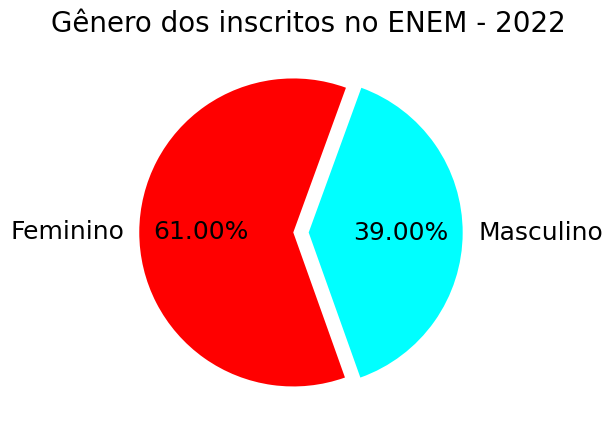

In [47]:
fig, ax = plt.subplots(figsize=(12, 5))
labels = ("Feminino", "Masculino")
explode = (0.10, 0) #distâncias entre as fatias
ax.pie(insc_p_sexo,
       labels=labels,
       autopct="%.2f%%",
       shadow=False,
       explode=explode,
       startangle=70,
       colors=["red", "cyan"],
       textprops={'fontsize': 18})
ax.set_title('Gênero dos inscritos no ENEM - 2022', fontsize=20)

# Distribuição de acordo com a raça/cor

In [48]:
df_enem['TP_COR_RACA'].unique()
#TP_COR_RACA

array([2, 1, 3, 5, 0, 4])

**Cor/Raça**

CÓDIGO | SIGNIFICADO
-------|-------------
0      | Não declarado
1      | Branca
2      | Preta
3      | Parda
4      | Amarela
5      | Indígena


In [49]:
df_enem['TP_COR_RACA'].value_counts()

3    1488844
1    1428081
2     408422
4      66051
0      64867
5      19840
Name: TP_COR_RACA, dtype: int64

In [50]:
df_enem['TP_COR_RACA'].value_counts(normalize=True)*100

3    42.830812
1    41.082792
2    11.749415
4     1.900144
0     1.866083
5     0.570754
Name: TP_COR_RACA, dtype: float64

# Mapa

(-76.24759047174989, -26.590499411250004, -35.7023289475499, 7.222992030550026)

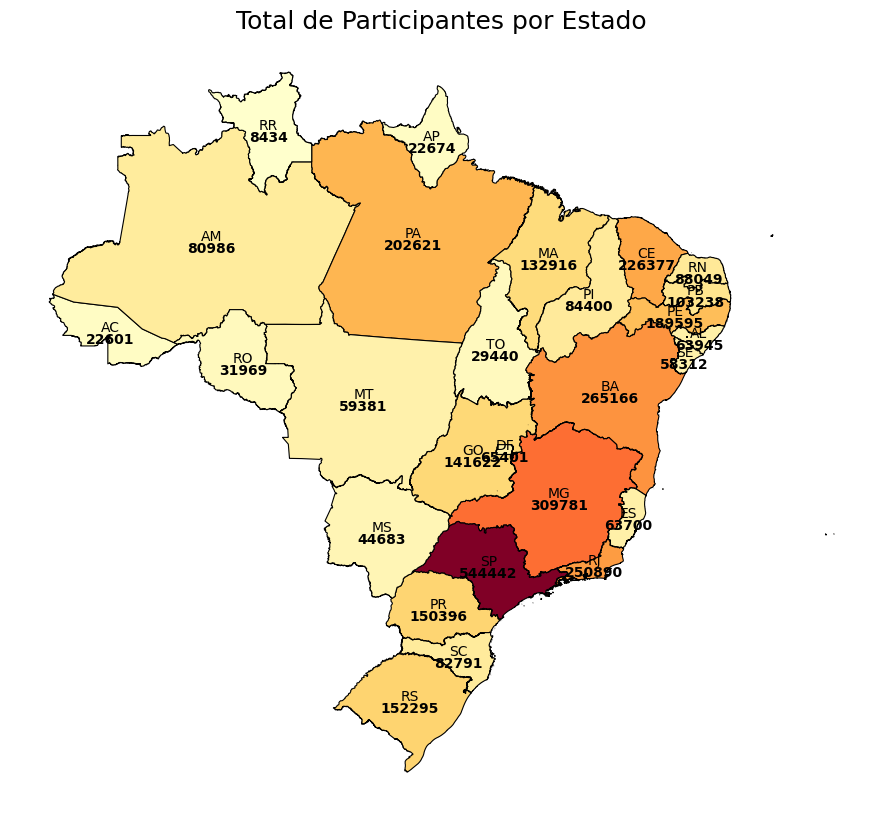

In [4]:
#importando o shapefile do brasil
infos_ufs = gpd.read_file('BR_UF_2022/BR_UF_2022.shp')
#SG_UF_PROVA => Sigla da Unidade da Federação da escola
esc_p_UF = df_enem["SG_UF_PROVA"].value_counts() #quantidade por sigla
dict_esc_p_UF = esc_p_UF.to_dict() # convertendo para o tipo dicionário

#incluindo uma coluna de quantidade de participantes por sigla no df infos_ufs
infos_ufs['SG_UF_PROVA'] = infos_ufs['SIGLA_UF'].map(dict_esc_p_UF)

#mapa
fig, ax = plt.subplots(1, figsize = (20,10))
infos_ufs.plot(column = 'SG_UF_PROVA',
               ax=ax,
               cmap = 'YlOrRd',
               linewidth=0.8,
               figsize = (20,7),
               legend = False,
               edgecolor = 'black')
plt.title("Total de Participantes por Estado", fontsize = 18)
infos_ufs.apply(lambda x: ax.annotate(text=x.SIGLA_UF, xy=x.geometry.centroid.coords[0], ha='center', color = "black"), axis=1)
infos_ufs.apply(lambda x: ax.annotate(text=x.SG_UF_PROVA, xy=x.geometry.centroid.coords[0], xytext=(0,-12), textcoords='offset pixels', ha='center', color = "black", weight='semibold'), axis=1)
ax.axis('off')

(-76.24759047174989, -26.590499411250004, -35.7023289475499, 7.222992030550026)

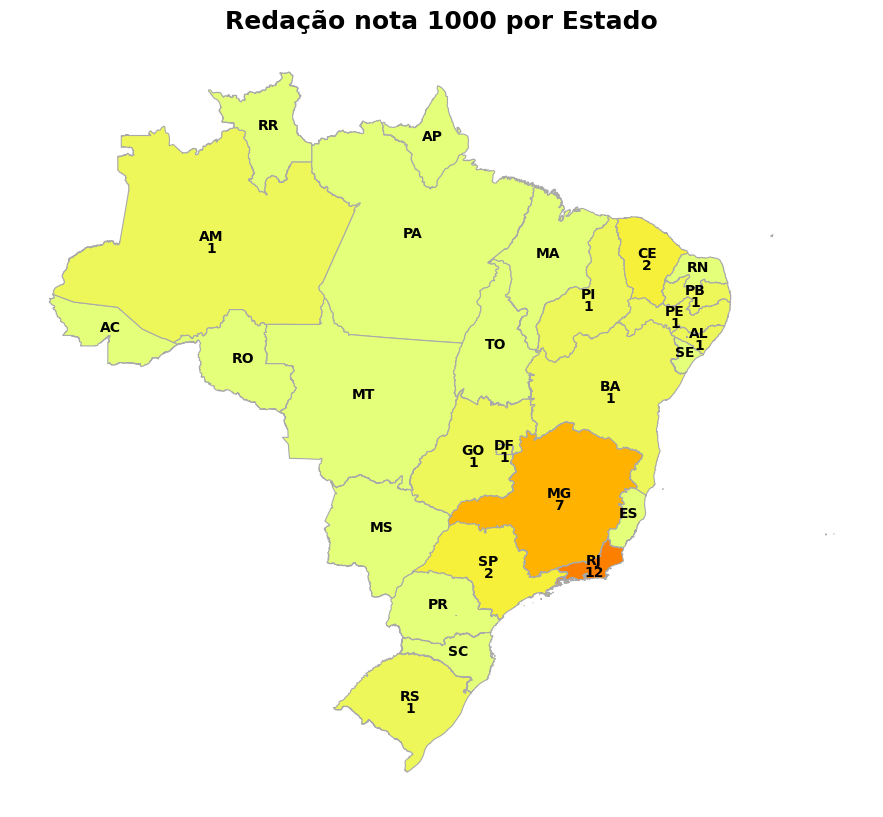

In [11]:
qtd_nota_1000_uf = df_enem[df_enem['NU_NOTA_REDACAO'] == 1000]['SG_UF_PROVA'].value_counts()
dict_qtd_nota_1000_uf = qtd_nota_1000_uf.to_dict() # convertendo para o tipo dicionário
infos_ufs['Redacao_1000'] = infos_ufs['SIGLA_UF'].map(dict_qtd_nota_1000_uf)

infos_ufs['Redacao_1000'] = infos_ufs['Redacao_1000'].fillna(0) # preenchendo com zero os estados sem redações nota 1000

#mapa
fig, ax = plt.subplots(1, figsize = (20,10))
infos_ufs.plot(column = 'Redacao_1000',
               ax=ax,
               cmap = 'Wistia',
               linewidth=0.8,
               figsize = (20,7),
               legend = False,
               edgecolor = 'darkgray',
               )
plt.title("Redação nota 1000 por Estado", fontsize = 18, weight='semibold')
infos_ufs.apply(lambda x: ax.annotate(text=x.SIGLA_UF, xy=x.geometry.centroid.coords[0], ha='center', color = "black", weight='semibold'), axis=1)
infos_ufs.apply(lambda x: ax.annotate(text=f'{round(x.Redacao_1000)}' if x.Redacao_1000 != 0 else '', xy=x.geometry.centroid.coords[0], xytext=(0,-12), textcoords='offset pixels', ha='center', color = "black", weight='semibold'), axis=1)
ax.axis('off')

### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classe

CÓDIGO | SIGNIFICADO
-------|-------------
A	| Nenhuma Renda
B	| Até 1212,00
C	| De 1212,01 até 1818,00
D	| De 1818,01 até 2424,00
E	| De 2424,01 até 3030,00
F	| De 3030,01 até 3636,00
G	| De 3636,01 até 4848,00
H	| De 4848,01 até 6060,00
I	| De 6060,01 até 7272,00
J	| De 7272,01 até 8484,00
K	| De 8484,01 até 9696,00
L	| De 9696,01 até 10908,00
M	| De 10908,01 até 12120,00
N	| De 12120,01 até 14544,00
O	| De 14544,01 até 18180,00
P	| De 18180,01 até 24240,00
Q	| Acima de 24240,00


In [47]:
df_enem['RENDA_MENSAL'].unique()

KeyError: 'RENDA_MENSAL'

In [7]:
dic_renda = {'A':0, 'B':1212, 'C':1818, 'D':2424, 'E':3030, 'F':3636, 'G':4848, 'H':6060,
              'I':7272, 'J':8484, 'K':9696, 'L':10908, 'M':12120, 'N':14544, 'O':18180,
              'P':24240, 'Q':24241}


In [8]:
df_enem['RENDA_MENSAL'] = df_enem['RENDA_MENSAL'].replace(dic_renda)

In [9]:
df_enem['RENDA_MENSAL'].unique()

array([ 1212, 24241,     0,  1818,  2424,  3030,  4848,  3636,  6060,
        7272,  9696, 10908,  8484, 24240, 18180, 14544, 12120])

In [14]:
frequencia_renda = pd.value_counts(df_enem['RENDA_MENSAL'])
percentual_renda = frequencia = pd.value_counts(df_enem['RENDA_MENSAL'],normalize = True)*100
percentual_renda = percentual_renda.round(2)

Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [15]:
dist_freq_quantitativas_personalizadas = pd.DataFrame(
    {'Frequência': frequencia_renda, 'Porcentagem (%)': percentual_renda})
dist_freq_quantitativas_personalizadas.sort_index(ascending = True,inplace = True)
dist_freq_quantitativas_personalizadas

,Frequência,Porcentagem (%)
0,204475,5.88
1212,1022869,29.43
1818,584278,16.81
2424,414266,11.92
3030,276704,7.96
3636,158091,4.55
4848,194319,5.59
6060,188751,5.43
7272,78916,2.27
8484,54984,1.58


In [19]:
novos_indices = ['Superior R$ 24240,00','Até R$ 24240,00','Até R$ 18180,00',
                'Até R$ 14544,00','Até R$ 12120,00','Até R$ 10908,00','Até R$ 9696,00',
                'Até R$ 8484,00','Até R$ 7272,00','Até R$ 6060,00','Até R$ 4848,00',
                'Até R$ 3636,00','Até R$ 3030,00','Até R$ 2424,00','Até R$ 1818,00',
                'Até R$ 1212,00','Sem Renda']
novos_indices.reverse()

In [20]:
dist_freq_quantitativas_personalizadas.index = novos_indices
dist_freq_quantitativas_personalizadas

,Frequência,Porcentagem (%)
Sem Renda,204475,5.88
"Até R$ 1212,00",1022869,29.43
"Até R$ 1818,00",584278,16.81
"Até R$ 2424,00",414266,11.92
"Até R$ 3030,00",276704,7.96
"Até R$ 3636,00",158091,4.55
"Até R$ 4848,00",194319,5.59
"Até R$ 6060,00",188751,5.43
"Até R$ 7272,00",78916,2.27
"Até R$ 8484,00",54984,1.58


Text(0.5, 1.0, 'Percentual da Renda Mensal dos inscritos no ENEM - 2022')

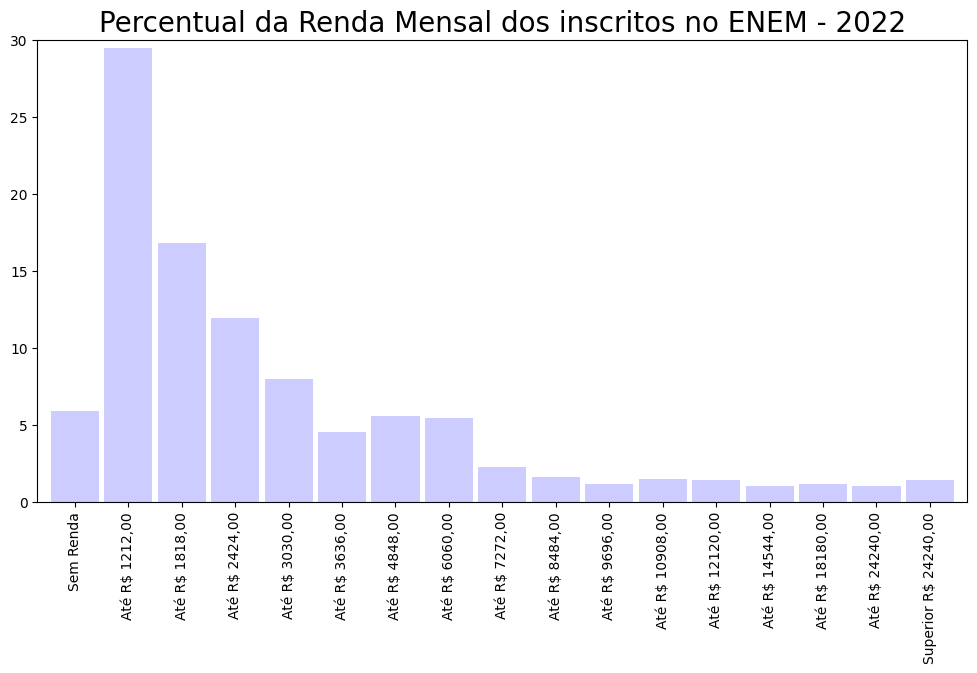

In [30]:
ax = dist_freq_quantitativas_personalizadas['Porcentagem (%)'].plot.bar(
    width=0.9,
    color = 'blue',
    alpha = 0.2,
    figsize=(12,6))
ax.set_ylim(0, 30)
ax.set_title('Percentual da Renda Mensal dos inscritos no ENEM - 2022', fontsize=20)


### Para aprofundar a análisa da variável RENDA MENSAL iremos considerar as seguintes classes em salários mínimos (SM)

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 1.212</b>.<br>
<font color='blue'>Fonte: LEI Nº 14.358, DE 1º DE JUNHO DE 2022 </font>

In [49]:
# uma ideia: fazer um replace da renda com as classes de acordo com o SM

qtd_nota_1000_renda = df_enem[df_enem['NU_NOTA_REDACAO'] == 1000]['RENDA_MENSAL'].value_counts()

In [56]:
qtd_nota_1000_renda #
# Dois alunos fora da curva, com redação nota 1000 com renda de 1SM

RENDA_MENSAL
Q    6
G    5
H    3
E    2
B    2
I    2
K    2
L    2
N    2
M    2
J    2
P    1
F    1
Name: count, dtype: int64